# Data Analytics - Project 1

In [ ]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
import csv 
from scipy.stats import shapiro

Note: This codes imports all necessary libraries for analyzing and visualizing the dataset

In [21]:
#creating a combined dataframe
df1 = pd.read_csv('2015_KSI.csv').drop_duplicates(subset=['INDEX_']).dropna()
df2 = pd.read_csv('2016_KSI.csv').drop_duplicates(subset=['INDEX_']).dropna()
df3 = pd.read_csv('2017_KSI.csv').drop_duplicates(subset=['INDEX_']).dropna()
df4 = pd.read_csv('2018_KSI.csv').drop_duplicates(subset=['INDEX_']).dropna()
frames = [df1, df2, df3, df4]
combined_df = pd.concat(frames, ignore_index=True)
combined_df.to_csv('combined_data.csv', index=False)

Note: The above code reads data from multiple CSV files, cleans the data by removing duplicates and missing values, combines them into a single DataFrame (combined_df), and then saves this combined DataFrame to a new CSV file for further analysis or storage. The data was first cleaned before merging the csv. Column names were cleaned to be uniform in all the data frames to ensure consistency of the data and avoid NaN errors.

In [22]:
#Extracting requied columns from dataframe
columns_to_extract = ["INJURY","FATAL_NO", "NEIGHBOURHOOD", "YEAR", "DISTRICT","VEHICLES_IN_STREET"]
extracted_df = combined_df[columns_to_extract]
print(extracted_df)

       INJURY FATAL_NO                    NEIGHBOURHOOD  YEAR        DISTRICT  \
0       Major   <Null>               Pleasant View (46)  2015      North York   
1        None   <Null>        Pelmo Park-Humberlea (23)  2015  Etobicoke York   
2       Major   <Null>                      Mimico (17)  2015  Etobicoke York   
3     Minimal   <Null>  Islington-City Centre West (14)  2015  Etobicoke York   
4       Fatal       33  Islington-City Centre West (14)  2015  Etobicoke York   
...       ...      ...                              ...   ...             ...   
3984     None   <Null>           Hillcrest Village (48)  2018      North York   
3985    Major   <Null>           Hillcrest Village (48)  2018      North York   
3986     None   <Null>                   Milliken (130)  2018     Scarborough   
3987    Major   <Null>                   Milliken (130)  2018     Scarborough   
3988     None   <Null>                   Milliken (130)  2018     Scarborough   

      VEHICLES_IN_STREET  


Note: The code above creates a new DataFrame (extracted_df) that contains only the extracted columns of interest.

In [30]:
extracted_df.head()

# displays the new dataset in a tabular form

,INJURY,FATAL_NO,NEIGHBOURHOOD,YEAR,DISTRICT,VEHICLES_IN_STREET
0,Major,<Null>,Pleasant View (46),2015,North York,46
1,None,<Null>,Pelmo Park-Humberlea (23),2015,Etobicoke York,23
2,Major,<Null>,Mimico (17),2015,Etobicoke York,17
3,Minimal,<Null>,Islington-City Centre West (14),2015,Etobicoke York,14
4,Fatal,33,Islington-City Centre West (14),2015,Etobicoke York,14


In [31]:
extracted_df.tail()


# displays the last five rows of the new dataset to show that it contains accident records through to 2018.

,INJURY,FATAL_NO,NEIGHBOURHOOD,YEAR,DISTRICT,VEHICLES_IN_STREET
3984,None,<Null>,Hillcrest Village (48),2018,North York,48
3985,Major,<Null>,Hillcrest Village (48),2018,North York,48
3986,None,<Null>,Milliken (130),2018,Scarborough,130
3987,Major,<Null>,Milliken (130),2018,Scarborough,130
3988,None,<Null>,Milliken (130),2018,Scarborough,130


In [32]:
extracted_df.describe()

# captures the summary statistics for columns with numerical data within the new data set.

,YEAR,VEHICLES_IN_STREET
count,3989.000000,3989.000000
mean,2016.551266,72.985711
std,1.118905,42.039666
min,2015.000000,1.000000
25%,2016.000000,36.000000
50%,2017.000000,76.000000
75%,2018.000000,113.000000
max,2018.000000,140.000000


In [33]:
# Filter for the last 4 years
current_year = 2018  # Assuming you want data for 2018, 2017, 2016, and 2015
last_4_years_data = combined_df[combined_df['YEAR'].between(current_year - 3, current_year)]

# Group by 'District' and sum 'Vehicles in Street' for each district
district_vehicle_totals = last_4_years_data.groupby('DISTRICT')['VEHICLES_IN_STREET'].sum().reset_index()

# Display the result
print(district_vehicle_totals)


                DISTRICT  VEHICLES_IN_STREET
0                 <Null>                 303
1         Etobicoke York               30572
2             North York               50188
3            Scarborough              117032
4      Toronto East York                 837
5  Toronto and East York               92208


Note: In this code snippet, the variable last_year is defined as 2018, representing the final year in the target 4-year range. The DataFrame last_4_years_data is created by filtering the 'combined_df' DataFrame to retain only the rows with 'YEAR' values falling between 2015 and 2018 using the between method. The district_vehicle_totals variable is then created and assingned the result of grouping the filtered data by the 'DISTRICT' column and calculating the sum of 'VEHICLES_IN_STREET' for each district. 
To ensure the 'DISTRICT' column remains a regular column, the reset_index() method is applied. Finally, the code prints the resulting district_vehicle_totals DataFrame to the console, presenting the total count of vehicles on the streets for each district during the last 4 years.

In [35]:
#removing null values

# Replace alternative representations of null values with np.nan
district_vehicle_totals['DISTRICT'].replace({'<Null>': np.nan}, inplace=True)

# Remove rows with null values in the 'DISTRICT' column
district_vehicle_totals = district_vehicle_totals.dropna(subset=['DISTRICT'])

# Display the result
print(district_vehicle_totals)


                DISTRICT  VEHICLES_IN_STREET
1         Etobicoke York               30572
2             North York               50188
3            Scarborough              117032
4      Toronto East York                 837
5  Toronto and East York               92208


Note: In this code segment, null values in the 'DISTRICT' column of the `district_vehicle_totals` DataFrame are effectively handled. Firstly, any alternative representations of null values, such as '\<Null>', are uniformly replaced with NumPy's `np.nan` to standardize null data. Next, rows with missing 'DISTRICT' values are removed from the DataFrame using the `dropna` method, resulting in a DataFrame that only contains rows with valid 'DISTRICT' information. Finally, the code prints the cleaned DataFrame, ensuring that it now exclusively includes rows without null values in the 'DISTRICT' column.

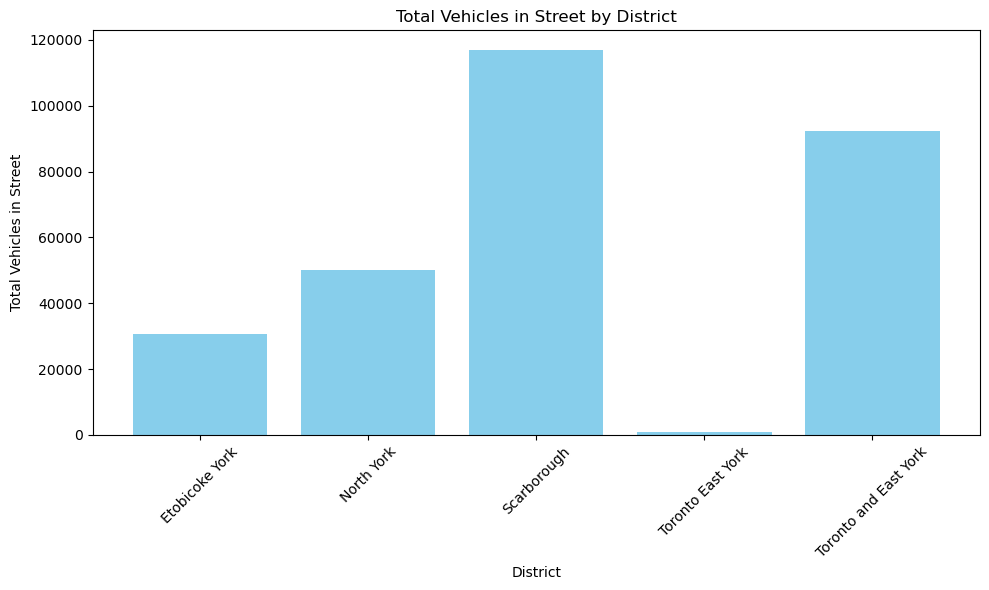

In [47]:
district_counts = district_vehicle_totals.groupby('DISTRICT')['VEHICLES_IN_STREET'].sum()

# Create a bar graph
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(district_counts.index, district_counts, color='skyblue')

# Add labels and a title
plt.xlabel('District')
plt.ylabel('Total Vehicles in Street')
plt.title('Total Vehicles in Street by District')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

Note: The visualization implemented above is a horizontal bar graph that shows the total vehicles in the street for each district for the last 4 years during the accidents. It represents data for five specific districts: Etobicoke York, North York, Scarborough, Toronto East York, and Toronto and East York. Each district is represented on the y-axis, while the corresponding vehicle count is shown on the x-axis.This chart allows viewers to compare the vehicle counts across these four districts at a glance. For example, Scarborough has the highest vehicle count, followed by Toronto and East York, while Toronto East York has the lowest count among the districts shown.

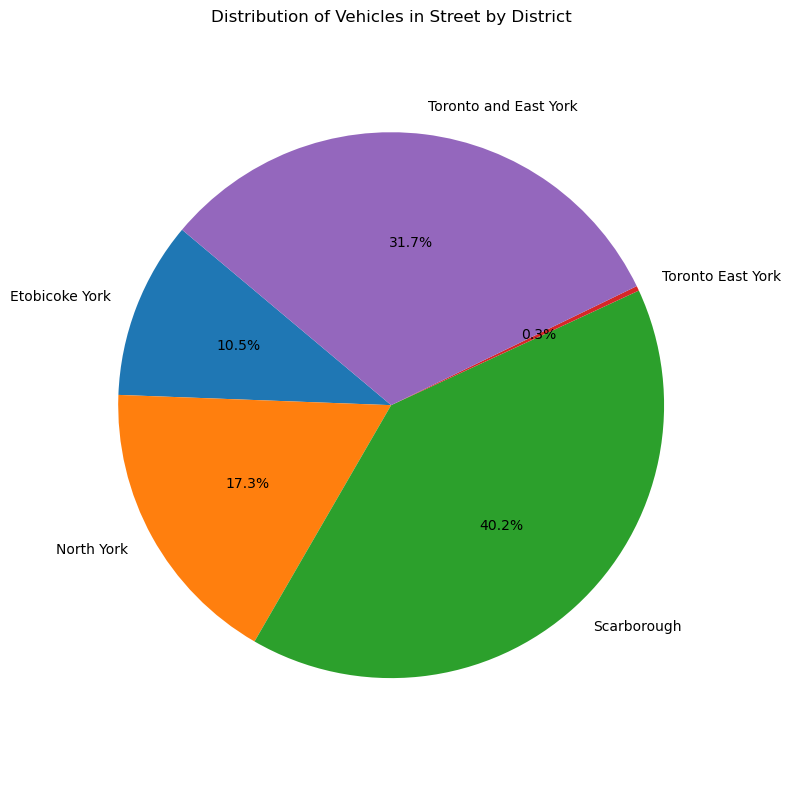

In [27]:


# Group your data by 'DISTRICT' and sum the 'VEHICLES_IN_STREET' for each district
district_counts = district_vehicle_totals.groupby('DISTRICT')['VEHICLES_IN_STREET'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size

# Plot the pie chart
plt.pie(district_counts, labels=district_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Distribution of Vehicles in Street by District')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.tight_layout()
plt.show()


Note: The pie chart created from the same data represents the distribution of vehicle counts across different districts. Each district is represented as a slice of the pie, with the size of each slice corresponding to the proportion of vehicles in the street for that district relative to the total.

"Scarborough" occupies the largest portion of the pie, indicating that it has the highest number of vehicles among the districts shown.
"Toronto and East York" is the second largest slice, signifying the second-highest vehicle count.
"Etobicoke York" and "North York" have smaller slices, indicating lower vehicle counts in these districts.

In [50]:
# Group by 'Neighborhood' and calculate the average 'Vehicles in Street' for each neighborhood


neighborhood_avg_vehicles = combined_df.groupby('NEIGHBOURHOOD')['VEHICLES_IN_STREET'].mean()

print(neighborhood_avg_vehicles )

NEIGHBOURHOOD
Agincourt North (129)                 129.0
Agincourt South-Malvern West (128)    128.0
Alderwood (20)                         20.0
Annex (95)                             95.0
Banbury-Don Mills (42)                 42.0
                                      ...  
Wychwood (94)                          94.0
Yonge-Eglinton (100)                  100.0
Yonge-St.Clair (97)                    97.0
York University Heights (27)           27.0
Yorkdale-Glen Park (31)                31.0
Name: VEHICLES_IN_STREET, Length: 138, dtype: float64


In [48]:
# Sort the neighborhoods by average vehicles in descending order and take the top 5

top_5_neighborhoods = neighborhood_avg_vehicles.nlargest(5)

# Display the result
print(top_5_neighborhoods)


NEIGHBOURHOOD
Guildwood (140)              140.0
Scarborough Village (139)    139.0
Eglinton East (138)          138.0
Woburn (137)                 137.0
West Hill (136)              136.0
Name: VEHICLES_IN_STREET, dtype: float64


Note: In this code, the DataFrame named "combined_df" is grouped by the 'NEIGHBOURHOOD' column. The objective is to calculate the average count of 'Vehicles in Street' for each neighborhood. After performing this grouping and aggregation, the code sorts the neighborhoods based on their average vehicle counts in descending order. Finally, the code selects the top 5 neighborhoods with the highest average vehicle counts and prints them out using the "print" statement.

In [29]:
ranked_list = top_5_neighborhoods.reset_index().reset_index()
ranked_list.columns = ['Rank', 'Neighborhood', 'Average Vehicles in Street']

# Increment the rank by 1
ranked_list['Rank'] += 1

# Display the ranked list
print(ranked_list)

   Rank               Neighborhood  Average Vehicles in Street
0     1            Guildwood (140)                       140.0
1     2  Scarborough Village (139)                       139.0
2     3        Eglinton East (138)                       138.0
3     4               Woburn (137)                       137.0
4     5            West Hill (136)                       136.0


Note: This code takes the previously generated "top_5_neighborhoods" DataFrame, which contains the top 5 neighborhoods with the highest average vehicle counts, and transforms it into a ranked list. It does so by resetting the index, renaming the columns appropriately, and then incrementing the 'Rank' column by 1 to start the ranking from 1 instead of 0. The resulting "ranked_list" DataFrame provides a clear and organized representation of the top neighborhoods in order of their average vehicle counts, making it easier to identify the highest-ranking neighborhoods.

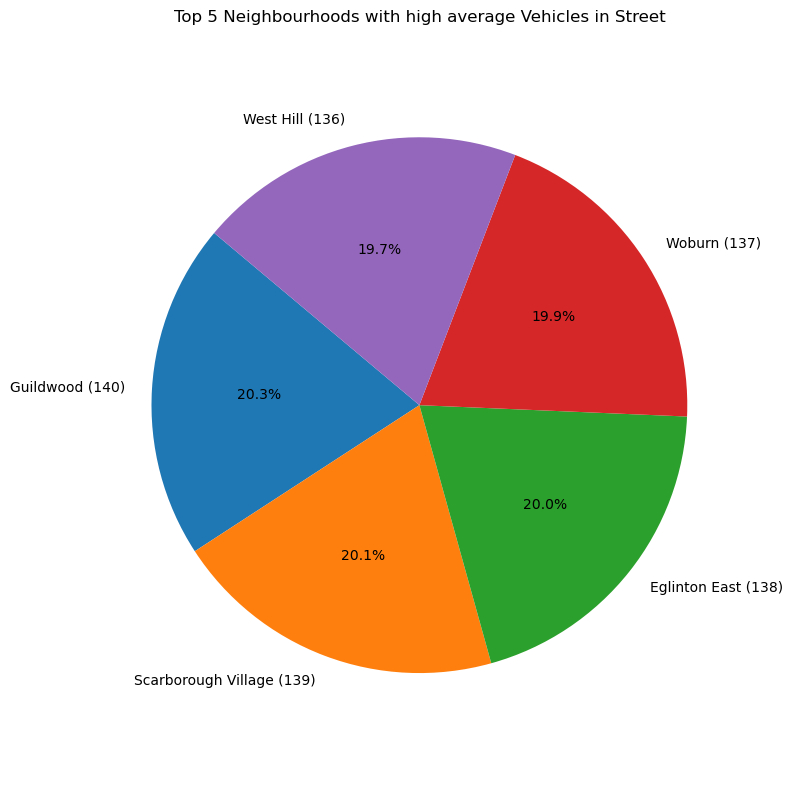

In [51]:
# Create a pie chart for the top 5 neighbourhoods listed above
plt.figure(figsize=(8, 8))  # Set the figure size

# Plot the pie chart
plt.pie(top_5_neighborhoods, labels=top_5_neighborhoods.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Top 5 Neighbourhoods with high average Vehicles in Street')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.tight_layout()
plt.show()


Note: The above pie chart is a representation of top 5 Neighbourhoods with high average Vehicles in Street listed in the previous block of code. The purpose of plotting the pie chart is for easier graphical visualization as we can see at a glance that the percentage distribution across the top 5 neighbourhoods are close. However, it's apparent that Guildwood has the largest slice with 20.3%, followed by Scarborough Village (20.1%), whereas West Hill is the least of the top 5 with 19.7% and an average of 136 vehicles in the street.